# **Question-1**

This answer is divided into 2 sections. 

***Section-1***

The below steps are used for the implementation of the first part / step-1 of SIFT algorithm which is the detection of the scale space extrema. The implementation of the first step is segregated into some smaller steps which are given below.  

1. Image input and Octave calculation
2. Lowe's Gaussian-Kernel pyramid 
3. Lowe's Gaussian-Blurred Image pyramid 
4. Lowe's DOG pyramid
5. Scale-space extrema in one octave
6. Scale-space extrema in all octave
7. Final function and Dectection of extrema Points


Here we visualize the extrema points on 2 selected images. The main libraries that will be used for this implementation are **PILLOW** and **NUMPY**.


***Section-2***

Some noise,scale,blur,rotatation is done to see what is happening in the SIFT extrema detection scheme.

*PS: The algorithms are implemented without any help from the other codes on the internet. I have looked into this [Github code](https://github.com/rmislam/PythonSIFT/blob/master/pysift.py) for reference (which is implemented using OPENCV) a bit for the implementation no of ocataves (I could not understand the other parts so implemented from sctratch using PILLOW and numpy).*

## ***Section-1***

In [2]:
##import some libraries for the implementation

import numpy as np
from PIL import Image, ImageFilter, ImageDraw
import matplotlib.pyplot as plt
from IPython.display import display

#### 1.1 Image Input and Octave Calculation

Here 2 functions are created :

**giveImage:** This take the input image from the user specified directory.

**numberOfOctaves:** This calculates the number of octaves based on the image size.

In [3]:
def giveImage(path):

    """This takes the input path to read the image in the environment"""

    image = Image.open(path)
    return image


def numberOfOctaves(image_size, restrict_octave):

    """Compute number of octaves in image pyramid. restrict_octave is hyper parameter that
    stops the octave according to the user so that the last image has enough size"""

    return int(round(np.log(min(image_size)) / np.log(2) - restrict_octave))


Visualize the Image-1 and check its size

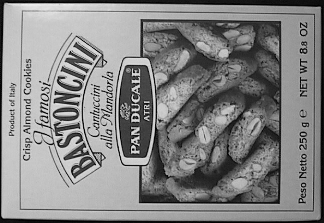

The size of the Image1 = (324, 223)


In [4]:
image1 = giveImage(
    "/home/subhodip/Desktop/Subhodip/IISc/PhD/Sem-1/Advanced Image processing/Assignments/Assignment-1/PythonSIFT/box.png"
)
display(image1)
print("The size of the Image1 =", image1.size)


Visualize the Image-2 and check its size

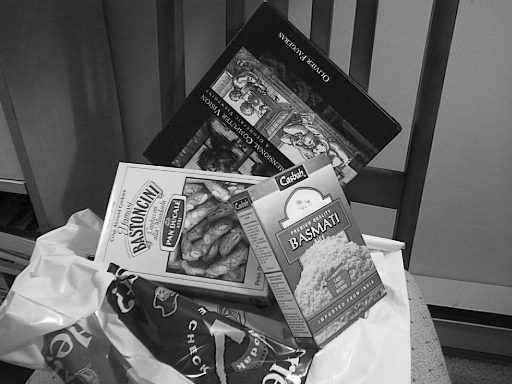

The size of the Image2 = (512, 384)


In [4]:
image2 = giveImage(
    "/home/subhodip/Desktop/Subhodip/IISc/PhD/Sem-1/Advanced Image processing/Assignments/Assignment-1/PythonSIFT/box_in_scene.png"
)
display(image2)
print("The size of the Image2 =", image2.size)


Check the no of octaves for the 2 images

In [5]:
num_octaves_image1 = numberOfOctaves(image1.size, 2)
num_octaves_image2 = numberOfOctaves(image2.size, 2)
print("The no of octaves for the image1= ", num_octaves_image1)
print("The no of octaves for the image2= ", num_octaves_image2)

The no of octaves for the image1=  6
The no of octaves for the image2=  7


#### 1.2 Lowe's Gaussian-Kernel pyramid

The below function gives the standard deviations of gaussian kernels as per the Lowe's paper. The *num_intervals* is similar to the s value represented in the paper. We know at each octave in the input side there is (s+3) no of images including the original image. At the start of the octave we don't do any convolution so the std of gaussian kernel is taken to be 0.

The outer list has length of the total no of octaves and each inner lists have the length of (s+3) which are the kernels' stds. 

In [6]:
def lowesKernelPyramid(sigma_init, num_octaves, num_intervals=3):

    """Generate list of list gaussian kernels at which to blur the input image for all the octaves."""

    total_sigma_pyramid = []
    num_filters_per_octave = num_intervals + 3
    for octave_idx in range(num_octaves):
        per_octave_sigma_pyramid = [0]
        for sigma_idx in range(1, num_filters_per_octave):
            current_sigma = (
                (2 ** ((sigma_idx - 1) / num_intervals)) * sigma_init * (octave_idx + 1)
            )
            per_octave_sigma_pyramid.append(current_sigma)
        total_sigma_pyramid.append(per_octave_sigma_pyramid)

    return total_sigma_pyramid


Gaussian kernel pyramid for Image-1

The sigma value of the initial kernel is taken to be one and s = 3 is taken as per the representation of the parameter in the paper. So the gaussian kernel size at each octave will be 6. As there are 6 octaves in image 1 the total size of the gaussian pyramid will be 6x6

In [7]:
total_sigma_pyramid_image1 = lowesKernelPyramid(1, num_octaves_image1, 3)
total_sigma_pyramid_image1

[[0, 1.0, 1.2599210498948732, 1.5874010519681994, 2.0, 2.5198420997897464],
 [0, 2.0, 2.5198420997897464, 3.1748021039363987, 4.0, 5.039684199579493],
 [0, 3.0, 3.7797631496846193, 4.762203155904598, 6.0, 7.559526299369239],
 [0, 4.0, 5.039684199579493, 6.3496042078727974, 8.0, 10.079368399158986],
 [0, 5.0, 6.299605249474366, 7.937005259840997, 10.0, 12.599210498948732],
 [0, 6.0, 7.559526299369239, 9.524406311809196, 12.0, 15.119052598738477]]

Gaussian kernel pyramid for Image-2

The sigma value of the initial kernel is taken to be one and s = 3 is taken as per the representation of the parameter in the paper. So the gaussian kernel size at each octave will be 6. As there are 7 octaves in image 1 the total size of the gaussian pyramid will be 7x6

In [8]:
total_sigma_pyramid_image2 = lowesKernelPyramid(1, num_octaves_image2, 3)
total_sigma_pyramid_image2


[[0, 1.0, 1.2599210498948732, 1.5874010519681994, 2.0, 2.5198420997897464],
 [0, 2.0, 2.5198420997897464, 3.1748021039363987, 4.0, 5.039684199579493],
 [0, 3.0, 3.7797631496846193, 4.762203155904598, 6.0, 7.559526299369239],
 [0, 4.0, 5.039684199579493, 6.3496042078727974, 8.0, 10.079368399158986],
 [0, 5.0, 6.299605249474366, 7.937005259840997, 10.0, 12.599210498948732],
 [0, 6.0, 7.559526299369239, 9.524406311809196, 12.0, 15.119052598738477],
 [0, 7.0, 8.819447349264113, 11.111807363777395, 14.0, 17.638894698528226]]

#### 1.3 Lowe's Gaussian-Blurred Image pyramid 

Now at first octave level the Image is convolved with all the kernels at first octave. Similarly at the next octave the original image is downsampled by 2 and then convolved with the corresponding kernels at that level. This is done for all the octaves.

**display_some_images** : this function is used for the displaying some of the images from the Gaussian-Blurred Image pyramid.

In [9]:
def lowesImagePyramid(img, total_sigma_pyramid):

    """This returns a list of list of gaussian blurred images for each octave"""

    total_image_pyramid = []
    for octave_idx in range(len(total_sigma_pyramid)):
        per_octave_image_pyramid = []
        new_width = int(img.width / (2**octave_idx))
        new_height = int(img.height / (2**octave_idx))
        resized_img = img.resize((new_width, new_height))
        for sigma in total_sigma_pyramid[octave_idx]:
            blurred_img = resized_img.filter(ImageFilter.GaussianBlur(radius=sigma))
            per_octave_image_pyramid.append(blurred_img)
        total_image_pyramid.append(per_octave_image_pyramid)

    return total_image_pyramid


def display_some_images(list_of_tuples, list_of_images):

    "This displays some images from the total image pyramid"

    for idx1, idx2 in list_of_tuples:
        display(list_of_images[idx1][idx2])

    return None


Showing some images from the Gaussian-Blurred Image pyramid for Image-1

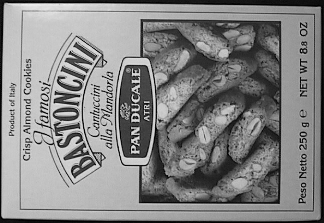

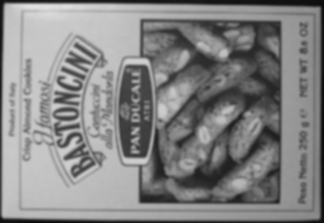

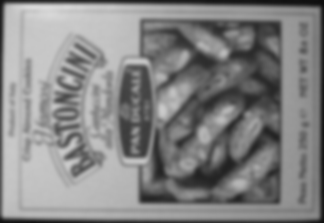

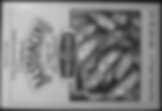

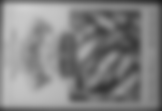

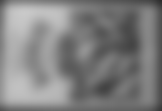

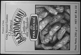

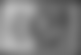

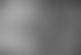

In [10]:
total_image_pyramid_image1 = lowesImagePyramid(image1, total_sigma_pyramid_image1)
image_index_lists = [
    (0, 0),
    (0, 2),
    (0, 4),
    (1, 1),
    (1, 3),
    (1, 5),
    (2, 0),
    (2, 3),
    (2, 5),
    (3, 1),
    (3, 3),
    (3, 5),
]
display_some_images(image_index_lists, total_image_pyramid_image1)


Showing some images from the Gaussian-Blurred Image pyramid for Image-2

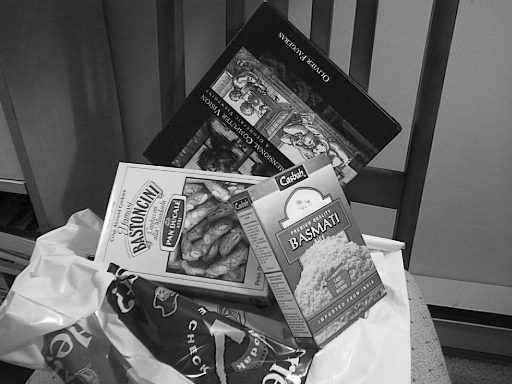

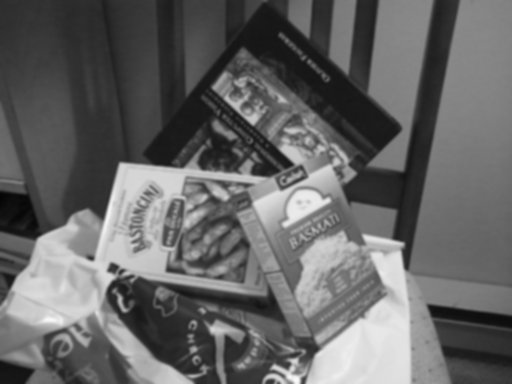

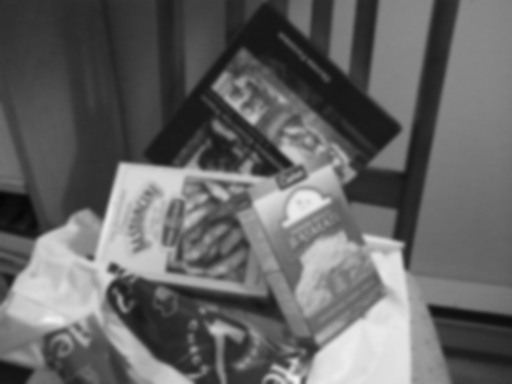

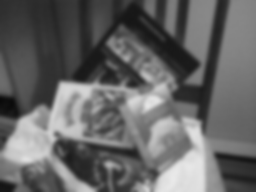

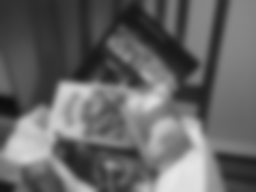

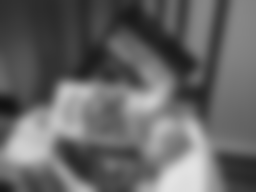

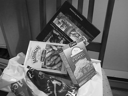

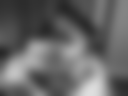

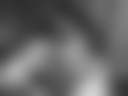

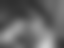

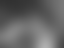

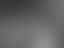

In [37]:
total_image_pyramid_image2 = lowesImagePyramid(image2, total_sigma_pyramid_image2)
image_index_lists = [
    (0, 0),
    (0, 2),
    (0, 4),
    (1, 1),
    (1, 3),
    (1, 5),
    (2, 0),
    (2, 3),
    (2, 5),
    (3, 1),
    (3, 3),
    (3, 5),
]
display_some_images(image_index_lists, total_image_pyramid_image2)

#### 1.4 Lowe's DOG pyramid

The below functions is used for the DOG of Images calculation. As we know at each octave the no of DOGs are = (s+2). The Gaussian Kernels are subtracted to get the DOGs at each octave level for all the octaves. The difference is made using [np.diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html)

In [12]:
def lowesDOGPyramid(total_image_pyramid):

    """This converts each PIL image as numpy array for each octave level and then perform the DOG
    operation at each level"""

    total_DOG_pyramid = []
    for octave_idx in range(len(total_image_pyramid)):
        per_octave_array_pyramid = []
        for img in total_image_pyramid[octave_idx]:
            img_array = np.asfarray(img)
            per_octave_array_pyramid.append(img_array)
        per_octave_DOG_array = np.diff(np.array(per_octave_array_pyramid), axis=0)
        total_DOG_pyramid.append(per_octave_DOG_array)

    return total_DOG_pyramid


DOG pyramid for Image-1. 

We see that in Image-1 total Gaussian Kernels were 6 at each octave. Now DOG at each each octave is 6-1=5

In [13]:
total_DOG_pyramid_image1 = lowesDOGPyramid(total_image_pyramid_image1)

for i in range(len(total_DOG_pyramid_image1)):
    print(
        "the DOG pyramid shape in octave {} is {}".format(
            i + 1, total_DOG_pyramid_image1[i].shape
        )
    )


the DOG pyramid shape in octave 1 is (5, 223, 324)
the DOG pyramid shape in octave 2 is (5, 111, 162)
the DOG pyramid shape in octave 3 is (5, 55, 81)
the DOG pyramid shape in octave 4 is (5, 27, 40)
the DOG pyramid shape in octave 5 is (5, 13, 20)
the DOG pyramid shape in octave 6 is (5, 6, 10)


#### 1.5 Scale-space extrema in one octave

This funtion find the scale space extrema for each octave present in the image. I have assumed a 3x3x3 kernel of ones which will slice the DOG images and then at each kernel position the mid point is the extrema or not checked. This kernel is moved accross all the DOG images in an octave to get the all extremum points. To take in account of the edge pixels of DOG in scale space I have zero padded the DOG to get if any extremum point is present or not in the DOG.

*PS: Even though this implementation I have done is acheiving the task but is not very good in terms of computations. 3 for loop I have used for each octave level but I think there will some better implementation that can do the task in 2 loops. I will think about this more to make it a bit optimized.*

In [15]:
def one_octave_extrema(per_octave_DOG_array):

    """This is function will run on one octave images to find the scale space extrema
    A kernel size of 3x3x3 is chosen to compare each pixel extrema with the neighbouring one"""

    ##zero pad the image in 3 dimensions to take account of the edges in scale and space both
    per_octave_DOG_zero_padded = np.pad(
        per_octave_DOG_array, ((1, 1), (1, 1), (1, 1)), mode="constant"
    )
    run_on_scale, run_on_rows, run_on_columns = per_octave_DOG_array.shape
    per_octave_extrema_locations = []
    for scale in range(run_on_scale):
        sliced_in_scale_space = per_octave_DOG_zero_padded[scale : scale + 3, :, :]
        for row in range(run_on_rows):
            sliced_in_row_space = sliced_in_scale_space[:, row : row + 3, :]
            for column in range(run_on_columns):
                sliced_in_column_space = sliced_in_row_space[:, :, column : column + 3]
                kernel_space_max = np.max(sliced_in_column_space)
                kernel_space_min = np.min(sliced_in_column_space)
                center_kernel_pixel_val = sliced_in_column_space[1, 1, 1]
                if (center_kernel_pixel_val == kernel_space_max) or (
                    center_kernel_pixel_val == kernel_space_min
                ):
                    per_octave_extrema_locations.append(
                        (
                            scale,
                            row,
                            column,
                        )  # here this cordinates are in actual octave arrays not on the zero padded images. zero padding is only done to take account of the edge parts.
                    )
                else:
                    continue
    return per_octave_extrema_locations


Extrema Points at the first octave of Image-1

In [39]:
first_octave_extrema_image1 = one_octave_extrema(total_DOG_pyramid_image1[0])
print("The no of extrema points in the first octave of image-1",len(first_octave_extrema_image1))
print("First Scale space extrema in first octave", first_octave_extrema_image1[0])
print("Last Scale space extrema in first octave", first_octave_extrema_image1[-1])


The no of extrema points in the first octave of image-1 45901
First Scale space extrema in first octave (0, 0, 1)
Last Scale space extrema in first octave (4, 222, 317)


#### 1.6 Scale-space extrema in all octave

**all_octave_extrema:** This funtion will basically calculate all the extrema points in all octave levels. This is the looped version of one_octave_extrema over all the octaves peresent.

**final_extrema_locations:** This will give all the extrema locations in one list. Also there exchange between the x,y cordinates as per the coordiantes of the Images.

In [17]:
def all_octave_extrema(total_DOG_pyramid):

    """This function is used for computing all the scale space extrema accross all the
    octaves"""

    total_extrema_locations = []
    for octave_idx in range(len(total_DOG_pyramid)):
        per_octave_DOG_array = total_DOG_pyramid[octave_idx]
        per_octave_extrema_locations = one_octave_extrema(per_octave_DOG_array)
        total_extrema_locations.append(per_octave_extrema_locations)
    return total_extrema_locations


def final_extrema_locations(total_extrema_locations):

    """This function gives all the list of points that are detected in all the octaves"""

    final_extrema_points = []
    for octave_idx in range(len(total_extrema_locations)):
        for _, loc_height, loc_width in total_extrema_locations[octave_idx]:
            final_extrema_points.append(
                (loc_width, loc_height)
            )  # the x,y is interchanged as per the image cordinates convention
    return final_extrema_points


Extrema points for Image-1

We see the no of extrema points detected on the image-1.

In [18]:
total_extrema_locations_image1 = all_octave_extrema(total_DOG_pyramid_image1)
final_extrema_locations_image1 = final_extrema_locations(total_extrema_locations_image1)
print(
    "The total no of image extrema points in image1=",
    len(final_extrema_locations_image1),
)


The total no of image extrema points in image1= 56336


#### 1.7 Final Function and Detection of extrema points on Image

**locating_extrema_points** : This will hightlight the points in the original image where the extremas are present.

**firststep_SIFT**: This is combining all the implemeneted parts and compacting in one single function that can be used by the user. The step-by-step process is followed as per the implementation is done sequentially.

In [26]:
def locating_extrema_points(image, final_extrema_locations):

    """This function will draw the rectangle around the extrema points"""

    image_copied_for_highlight = image.copy()
    image_with_extrema_detected = ImageDraw.Draw(image_copied_for_highlight)
    for loc_width, loc_height in final_extrema_locations:
        image_with_extrema_detected.point((loc_width , loc_height ))

    return image_copied_for_highlight

def firststep_SIFT(path_or_image, sigma_int, restrict_octave = 2, num_intervals=3):

    """This functions take all the parts implemented above to give the extrema points on image"""
    
    if type(path_or_image) == str :
        image = giveImage(path_or_image)
    else:
        image = path_or_image
    num_octave = numberOfOctaves(image.size, restrict_octave)
    kernel_pyramid = lowesKernelPyramid(sigma_int, num_octave, num_intervals)
    gaussian_pyramid = lowesImagePyramid(image, kernel_pyramid)
    DOG_pyramid = lowesDOGPyramid(gaussian_pyramid)
    total_extrema_locations = all_octave_extrema(DOG_pyramid)
    image_extrema_locations = final_extrema_locations(total_extrema_locations)
    print("The total no of scale-space extrema points are = ",len(image_extrema_locations))
    detected_extrema_on_image = locating_extrema_points(image,image_extrema_locations)
    display(detected_extrema_on_image)

## ***Results and Analysis***

Here we look at the first image and detect the extrema points. We see that there are 56336 no of extrema points in the image. Some of them are edge points and not good representation of the whole image. All the points are not robust.

The total no of scale-space extrema points are =  56336


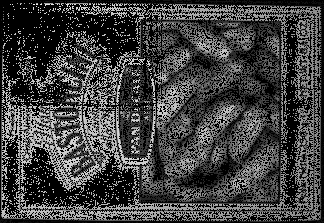

In [23]:
## Detect the extrema on image-1
image1_path = "/home/subhodip/Desktop/Subhodip/IISc/PhD/Sem-1/Advanced Image processing/Assignments/Assignment-1/PythonSIFT/box.png"
firststep_SIFT(image1_path,1)


Here we look at the second image and see that there are 283447 extrema points. Eventhough it is capturing the good extrema points but there are some points which are not good and robust features to detect. 

The total no of scale-space extrema points are =  283447


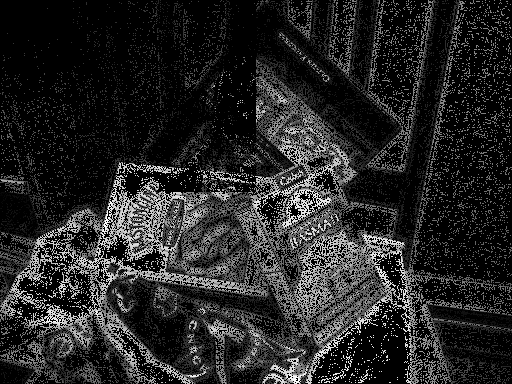

In [24]:
## Detect the extrema on image-2
image2_path = "/home/subhodip/Desktop/Subhodip/IISc/PhD/Sem-1/Advanced Image processing/Assignments/Assignment-1/PythonSIFT/box_in_scene.png"
firststep_SIFT(image2_path,1)

## ***Section-2***

In this section the following effects are studied

1. Rotation effect
2. Scale effect
3. Blur effect

#### 2.1 Rotation effect 

**Analysis**: Here we see that when we rotate the image-1 and then detect the extremas the feature points are extactly similar and the total no of points are still same. So we conclude that **SIFT is invariant to rotation**

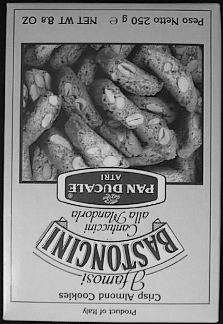

The total no of scale-space extrema points are =  56336


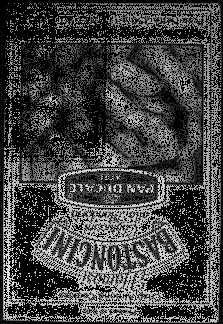

In [28]:
rotated_image1 = image1.rotate(90,expand=1)
display(rotated_image1)
firststep_SIFT(rotated_image1,1)

#### 2.2 Scale effect

**Analysis**: Here we see that when we scale the image-1 and then detect the extremas the feature points are almost similar but the total no of points are has increasing a lot. So we conclude that **SIFT is partially invariant to scaling**

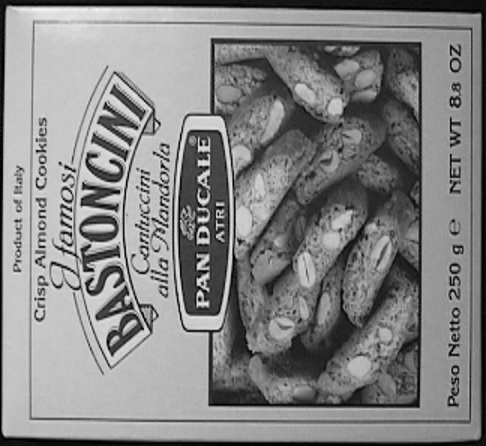

The total no of scale-space extrema points are =  219220


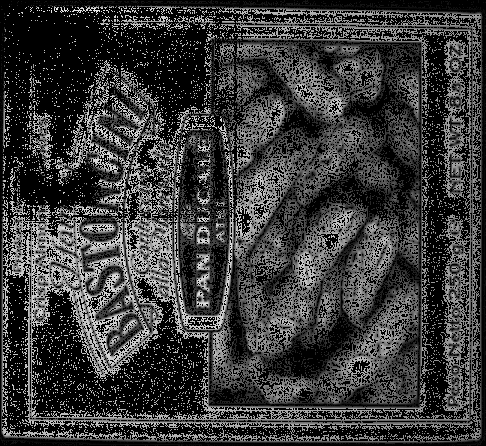

In [32]:
width, height = image1.size
scaled_image1 = image1.resize((int(1.5*width),2*height))
display(scaled_image1)
firststep_SIFT(scaled_image1,1)

#### 2.3 Effect of Blurring

**Analysis**: Here we see that when we blur the image-1 and then detect the extremas the feature points have less variance among them and more finer but the total no of points are has increasing also.

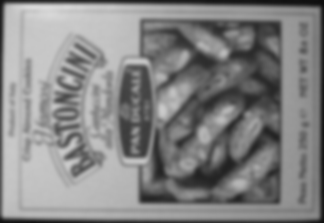

The total no of scale-space extrema points are =  138592


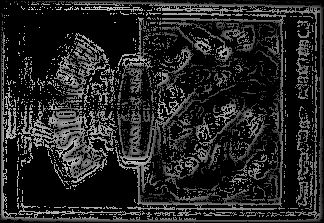

In [42]:
blurred_image1 = image1.filter(ImageFilter.GaussianBlur(radius=2))
display(blurred_image1)
firststep_SIFT(blurred_image1,1)